<a href="https://colab.research.google.com/github/SattaPavani/Code_Alpha-Data-Visualization/blob/main/CodeAlphaTask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DATA VISUALIZATION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
data=pd.read_csv('/content/ElectricCarData_Clean.csv')
print(data.head(5))

         Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   
3         BMW                            iX3        6.8           180   
4       Honda                              e        9.5           145   

   Range_Km  Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain  \
0       450              161            940         Yes        AWD   
1       270              167            250         Yes        RWD   
2       400              181            620         Yes        AWD   
3       360              206            560         Yes        RWD   
4       170              168            190         Yes        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 CCS  Hatchback       C  

##DISTRIBUTION OF NUMERIC FEATURES (HISTOGRAM)

In [ ]:
fig1= px.histogram(data,
                   x='Range_Km',
                   nbins=10,
                   title='Histogram of Range_Km',
                   labels={'Range_Km': 'Speed (Km/H)'},
                   template='plotly_white',
                   width=900,
                   height=600)
fig1.show()

##DETERMINING THE ACCELERATION PERFORMANCE ACROSS DIFFERENT POWERTRAIN TYPES(BOX PLOT)

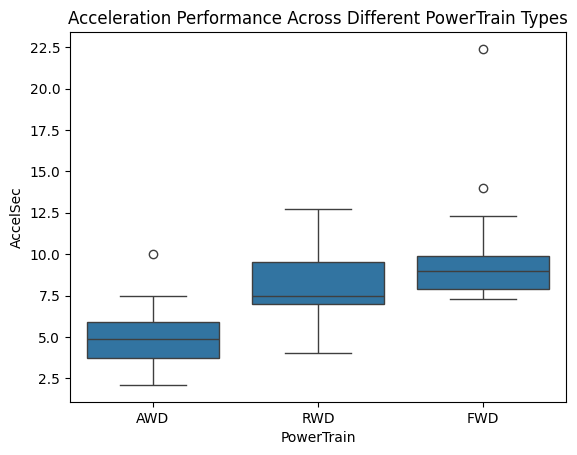

In [ ]:
fig2=sns.boxplot(x="PowerTrain",y="AccelSec",data=data)
plt.title("Acceleration Performance Across Different PowerTrain Types")
plt.show()

##RELATION BETWEEN RANGE AND EFFICIENCY(SCATTER PLOT)

In [ ]:
fig3=px.scatter(data,x='Range_Km',y='Efficiency_WhKm', title='Relationship between Range and Efficiency',width=900,height=600)
fig3.show()

##CORRELATION HEATMAP OF  NUMERIC FEATURES

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000


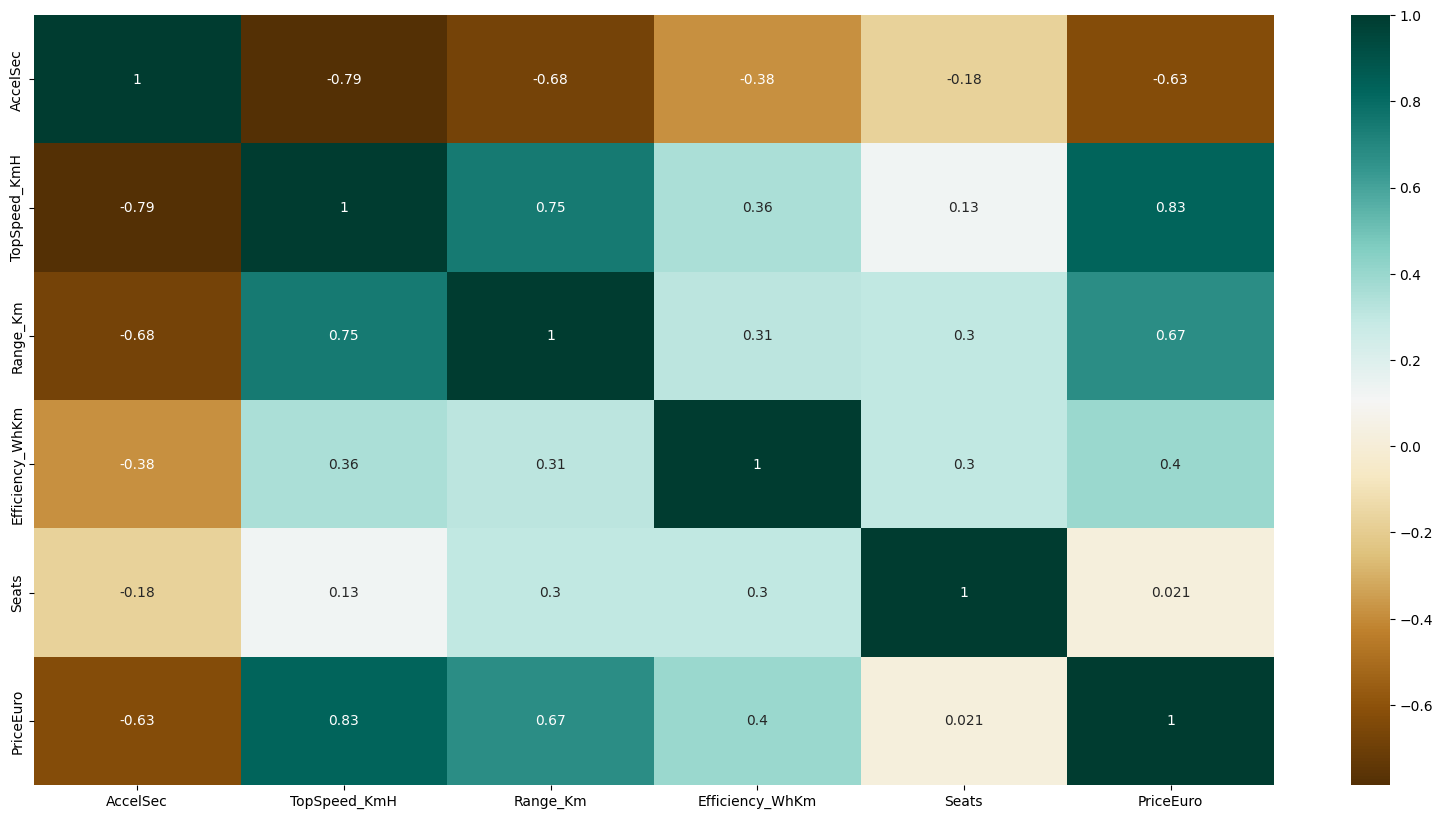

In [ ]:
fig4=plt.figure(figsize=(20,10))
selected_columns = data.select_dtypes(include=["int64", "float64"]).columns
c = data[selected_columns].corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c

##DISTRIBUTION OF BODY STYLE(PIE CHART)

In [ ]:
fig5= px.pie(data,
             names='BodyStyle',
             title='Distribution of Body Style in Electric Vehicles',height=900,width=600)
fig5.show()

##DASHBOARD

In [ ]:
pip install dash

In [40]:
from dash import html, dcc
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas here

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

colors = {'background': '#ffffff', 'text': '#2e3532'}

# Re-load the data to ensure it's the correct electric car dataset
data = pd.read_csv('/content/ElectricCarData_Clean.csv')

fig1 = px.histogram(data, x='Range_Km', nbins=10, title='Histogram of Range_Km', labels={'Range_Km': 'Speed (Km/H)'}, template='plotly_white', width=900, height=600)

# Replaced seaborn boxplot with plotly.express.box for direct Dash compatibility
fig2 = px.box(data, x="PowerTrain", y="AccelSec", title="Acceleration Performance Across Different PowerTrain Types")

fig3 = px.scatter(data, x='Range_Km', y='Efficiency_WhKm', title='Relationship between Range and Efficiency', width=900, height=600)

c = data[data.select_dtypes(include=["int64", "float64"]).columns].corr()
fig4 = px.imshow(c, text_auto=True, color_continuous_scale='BrBG', title='Correlation Heatmap of Numeric Features', width=900, height=600)

fig5 = px.pie(data, names='BodyStyle', title='Distribution of Body Style in Electric Vehicles', height=900, width=600)

app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1('ELECTRIC VEHICLE MARKET ANALYSIS', style={'textAlign': 'center', 'color': colors['text']}),
    html.Div('- By Pavani', style={'textAlign': 'center', 'color': colors['text']}),
    html.Div([
        html.Div([dcc.Graph(id='firstgraph1', figure=fig1)], style={'width': '33%', 'display': 'inline-block', 'padding': '10px'}),
        html.Div([dcc.Graph(id='firstgraph2', figure=fig2)], style={'width': '33%', 'display': 'inline-block', 'padding': '10px'}),
        html.Div([dcc.Graph(id='firstgraph3', figure=fig3)], style={'width': '33%', 'display': 'inline-block', 'padding': '10px'})
    ], style={'display': 'flex', 'justify-content': 'space-between'}),
    html.Div([
        html.Div([dcc.Graph(id='firstgraph4', figure=fig4)], style={'width': '50%', 'display': 'inline-block', 'padding': '10px'}),
        html.Div([dcc.Graph(id='firstgraph5', figure=fig5)], style={'width': '50%', 'display': 'inline-block', 'padding': '10px'})
    ], style={'display': 'flex', 'justify-content': 'space-between'})
])

app.run(mode='inline', port=8050)

<IPython.core.display.Javascript object>